In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.precision', 2)
root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_measurements(df):
    mae = {}
    rmse = {}
    for SA in ['forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion']:
        #print('alg ', SA)
        if not (df['sampling algorithm'] ==SA).any():
          mae[SA] ='NaN'
          rmse[SA] = 'NaN'
        else:
          dfx = df[df['sampling algorithm']==SA]
          mae[SA]=round(mean_absolute_error(dfx['target'], dfx['pred']), 2)
          rmse[SA]=round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 2)
    return mae, rmse

In [ ]:
def get_measurements_precision_rank(df):
    for graph_id in set(df['graph_ID']):
        df_graph = df[df['graph_ID'] == graph_id]

        if not (df['sampling algorithm'] ==SA).any():
          mae[SA] ='NaN'
          rmse[SA] = 'NaN'
        else:
          dfx = df[df['sampling algorithm']==SA]
          mae[SA]=round(mean_absolute_error(dfx['target'], dfx['pred']), 2)
          rmse[SA]=round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 2)
    return mae, rmse

In [ ]:
def get_measurements_per_data(df_data):
  rmse = {}
  for SA in ['forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion']:
      #print('alg ', SA)
      if not (df_data['sampling algorithm'] ==SA).any():
        rmse[SA] = 'NaN'
      else:
        dfx = df_data[df_data['sampling algorithm']==SA]
        rmse[SA]=round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 2)
  return rmse

In [ ]:
def get_table_rmse_per_data(metric, model_num, feature_set_num, data_type, res_version):
    #maes = []
    content = []

    df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
    graphs_ids = set(df_rf['graph_ID'])
    df_mlp = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
    df_knn = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
    #print('df ', df)
    for graph_id in graphs_ids:
      syn_rf_rmse = get_measurements_per_data(df_rf[df_rf['graph_ID']==graph_id])
      syn_mlp_rmse = get_measurements_per_data(df_mlp[df_mlp['graph_ID']==graph_id])
      syn_knn_rmse = get_measurements_per_data(df_knn[df_knn['graph_ID']==graph_id])
      content.extend([get_row(graph_id, metric , 'RF', syn_rf_rmse),
              get_row(graph_id, metric, 'MLP', syn_mlp_rmse),
              get_row(graph_id, metric, 'kNN', syn_knn_rmse)])
    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['Dataset type', 'Metric', 'Model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_measurements_runtime(df):
    mae = {}
    rmse = {}
    mape = {}
    avg_true_values = {}
    for SA in ['forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion']:
        if not (df['sampling algorithm'] ==SA).any():
          mae[SA] ='NaN'
          rmse[SA] = 'NaN'
          mape[SA] = 'NaN'
        else:
          dfx = df[df['sampling algorithm']==SA]
          mae[SA]=round(mean_absolute_error(dfx['target'], dfx['pred']), 2)
          rmse[SA]=round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 2)
          mape[SA] = round(mean_absolute_percentage_error(dfx['target'], dfx['pred']), 2)
        avg_true_values[SA] = round(np.mean(dfx['target']))
    return mae, rmse, mape, avg_true_values

In [ ]:
def get_table_rank_precision_per_type():
    precisions = {}
    for SA in ['forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion']:
        #print('alg ', SA)
        if not (df['sampling algorithm'] ==SA).any():
          mae[SA] ='NaN'
          rmse[SA] = 'NaN'
        else:
          dfx = df[df['sampling algorithm']==SA]
          mae[SA]=round(mean_absolute_error(dfx['target'], dfx['pred']), 2)
          rmse[SA]=round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 2)
    return mae, rmse

In [ ]:
def get_row(dataset_type, metric, model, hashmap):
    row = [dataset_type, metric, model]
    for sampler in ['forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion']:
        row = row + [hashmap[sampler]]
    return row

In [ ]:
def get_table(metric, model_num, feature_set_num, data_types, res_version):
    maes = []
    rmses = []
    content = []

    for data_type in data_types:
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        #print('df ', df)
        syn_rf_mae, syn_rf_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_mlp_mae, syn_mlp_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_knn_mae, syn_knn_rmse = get_measurements(df)
        maes.extend([syn_rf_mae, syn_mlp_mae, syn_knn_mae])
        rmses.extend([syn_rf_rmse, syn_mlp_rmse, syn_knn_rmse])
        content.extend([get_row(data_type, 'MAE', 'RF', syn_rf_mae),
              get_row(data_type, 'MAE', 'MLP', syn_mlp_mae),
              get_row(data_type, 'MAE', 'kNN', syn_knn_mae),
              get_row(data_type, 'RMSE', 'RF', syn_rf_rmse),
              get_row(data_type, 'RMSE', 'MLP', syn_mlp_rmse),
              get_row(data_type, 'RMSE', 'kNN', syn_knn_rmse)])
    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['dataset type', 'metric', 'model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_table_rank_precision_per_type(metric, model_num, feature_set_num, data_types, res_version):
    maes = []
    rmses = []
    content = []

    for data_type in data_types:
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        #print('df ', df)
        syn_rf_mae, syn_rf_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_mlp_mae, syn_mlp_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_knn_mae, syn_knn_rmse = get_measurements(df)
        maes.extend([syn_rf_mae, syn_mlp_mae, syn_knn_mae])
        rmses.extend([syn_rf_rmse, syn_mlp_rmse, syn_knn_rmse])
        content.extend([get_row(data_type, 'MAE', 'RF', syn_rf_mae),
              get_row(data_type, 'MAE', 'MLP', syn_mlp_mae),
              get_row(data_type, 'MAE', 'kNN', syn_knn_mae),
              get_row(data_type, 'RMSE', 'RF', syn_rf_rmse),
              get_row(data_type, 'RMSE', 'MLP', syn_mlp_rmse),
              get_row(data_type, 'RMSE', 'kNN', syn_knn_rmse)])
    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['dataset type', 'metric', 'model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_table_rmse(metric, model_num, feature_set_num, data_types, res_version):
    #maes = []
    rmses = []
    content = []

    for data_type in data_types:
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        #print('df ', df)
        _, syn_rf_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        _, syn_mlp_rmse = get_measurements(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        _, syn_knn_rmse = get_measurements(df)
        #maes.extend([syn_rf_mae, syn_mlp_mae, syn_knn_mae])
        rmses.extend([syn_rf_rmse, syn_mlp_rmse, syn_knn_rmse])
        content.extend([get_row(data_type, metric , 'RF', syn_rf_rmse),
              get_row(data_type, metric, 'MLP', syn_mlp_rmse),
              get_row(data_type, metric, 'kNN', syn_knn_rmse)])
    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['Dataset type', 'Metric', 'Model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_table_runtime_3_metric(metric, model_num, feature_set_num, data_types, res_version):
    maes = []
    rmses = []
    mapes = []
    content = []

    for data_type in data_types:
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_rf_mae, syn_rf_rmse, syn_rf_mape, syn_avg_true = get_measurements_runtime(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_mlp_mae, syn_mlp_rmse, syn_mlp_mape, _ = get_measurements_runtime(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        syn_knn_mae, syn_knn_rmse, syn_knn_mape, _ = get_measurements_runtime(df)
        maes.extend([syn_rf_mae, syn_mlp_mae, syn_knn_mae])
        rmses.extend([syn_rf_rmse, syn_mlp_rmse, syn_knn_rmse])
        mapes.extend([syn_rf_mape, syn_mlp_mape, syn_knn_mape])
        content.extend([#get_row(data_type, 'MAE', 'RF', syn_rf_mae),
              #get_row(data_type, 'MAE', 'MLP', syn_mlp_mae),
              #get_row(data_type, 'MAE', 'kNN', syn_knn_mae),
              #get_row(data_type, 'RMSE', 'RF', syn_rf_rmse),
              get_row(data_type, 'RMSE', 'MLP', syn_mlp_rmse),
              get_row(data_type, 'RMSE', 'kNN', syn_knn_rmse),
              #get_row(data_type, 'MAPE', 'RF', syn_rf_mape),
              #get_row(data_type, 'MAPE', 'MLP', syn_mlp_mape),
              #get_row(data_type, 'MAPE', 'kNN', syn_knn_mape),
              get_row('Avg ET', '-', '-', syn_avg_true)])

    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['dataset type', 'metric', 'model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_table_runtime_3_metric_kNN(metric, model_num, feature_set_num, data_types, res_version):
    maes = []
    rmses = []
    mapes = []
    content = []

    for data_type in data_types:
        #df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        #syn_rf_mae, syn_rf_rmse, syn_rf_mape, syn_avg_true = get_measurements_runtime(df)
        #df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
        #syn_mlp_mae, syn_mlp_rmse, syn_mlp_mape, _ = get_measurements_runtime(df)
        df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))

        syn_knn_mae, syn_knn_rmse, syn_knn_mape, syn_avg_true = get_measurements_runtime(df)
        maes.extend([syn_knn_mae])
        rmses.extend([syn_knn_rmse])
        mapes.extend([syn_knn_mape])
        content.extend([#get_row(data_type, 'MAE', 'RF', syn_rf_mae),
              #get_row(data_type, 'MAE', 'MLP', syn_mlp_mae),
              #get_row(data_type, 'MAE', 'kNN', syn_knn_mae),
              #get_row(data_type, 'RMSE', 'RF', syn_rf_rmse),
              #get_row(data_type, 'RMSE', 'MLP', syn_mlp_rmse),
              get_row(data_type, 'RMSE', 'kNN', syn_knn_rmse),
              #get_row(data_type, 'MAPE', 'RF', syn_rf_mape),
              #get_row(data_type, 'MAPE', 'MLP', syn_mlp_mape),
              get_row(data_type, 'MAPE', 'kNN', syn_knn_mape),
              get_row(data_type, 'Avg', '-', syn_avg_true)])

    samplers_abbr = {'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
    headers = ['dataset type', 'metric', 'model', samplers_abbr['forest fire'], samplers_abbr['random degree node'], samplers_abbr['random edge'], samplers_abbr['random jump'], samplers_abbr['random node'], samplers_abbr['random node edge'], samplers_abbr['snowball'], samplers_abbr['frontier'], samplers_abbr['rank degree'], samplers_abbr['induced random edge'], samplers_abbr['metropolis hastings random walk'], samplers_abbr['expansion']]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def get_table_runtime(metric):
    experiment = 'experiment-3'
    df = pd.read_csv('results/{}/synthetic-{}-RF.csv'.format(experiment, metric))
    syn_rf_mae, syn_rf_rmse = get_measurements(df)
    df = pd.read_csv('results/{}/synthetic-{}-MLP.csv'.format(experiment, metric))
    syn_mlp_mae, syn_mlp_rmse = get_measurements(df)
    df = pd.read_csv('results/{}/synthetic-{}-kNN.csv'.format(experiment, metric))
    syn_knn_mae, syn_knn_rmse = get_measurements(df)
    df = pd.read_csv('results/{}/real_world-{}-RF.csv'.format(experiment, metric))
    rw_rf_mae, rw_rf_rmse = get_measurements(df)
    df = pd.read_csv('results/{}/real_world-{}-MLP.csv'.format(experiment, metric))
    rw_mlp_mae, rw_mlp_rmse = get_measurements(df)
    df = pd.read_csv('results/{}/real_world-{}-kNN.csv'.format(experiment, metric))
    rw_knn_mae, rw_knn_rmse = get_measurements(df)

    maes = [syn_rf_mae, syn_mlp_mae, syn_knn_mae, rw_rf_mae, rw_mlp_mae, rw_knn_mae]
    rmses = [syn_rf_rmse, syn_mlp_rmse, syn_knn_rmse, rw_rf_rmse, rw_mlp_rmse, rw_knn_rmse]

    headers = ['dataset type', 'metric', 'model', 'RN', 'RDN', 'RNE', 'RE', 'RJ', 'SB', 'FF']

    content = [get_row('synthetic', 'MAE', 'RF', syn_rf_mae),
              get_row('synthetic', 'MAE', 'MLP', syn_mlp_mae),
              get_row('synthetic', 'MAE', 'kNN', syn_knn_mae),
              get_row('real-world', 'MAE', 'RF', rw_rf_mae),
              get_row('real-world', 'MAE', 'MLP', rw_mlp_mae),
              get_row('real-world', 'MAE', 'kNN', rw_knn_mae),
              get_row('synthetic', 'RMSE', 'RF', syn_rf_rmse),
              get_row('synthetic', 'RMSE', 'MLP', syn_mlp_rmse),
              get_row('synthetic', 'RMSE', 'kNN', syn_knn_rmse),
              get_row('real-world', 'RMSE', 'RF', rw_rf_rmse),
              get_row('real-world', 'RMSE', 'MLP', rw_mlp_rmse),
              get_row('real-world', 'RMSE', 'kNN', rw_knn_rmse)
              ]
    report = pd.DataFrame(content, columns = headers)

    return report

In [ ]:
def print_cluster_metric(cluster, dfx):
    mae = round(mean_absolute_error(dfx['target'], dfx['pred']), 4)
    rmse = round(mean_squared_error(dfx['target'], dfx['pred'], squared=False), 4)
    return {'cluster': cluster, 'mae': mae, 'rmse': rmse}

In [ ]:
df = pd.read_csv('results/real_world-{}-RF.csv'.format('D3'))
df['graph type'].unique()

In [ ]:
metric='D3'

In [ ]:
dfx1 = pd.read_csv('results/real_world-{}-RF.csv'.format(metric))
dfx2 = pd.read_csv('results/real_world-{}-MLP.csv'.format(metric))
dfx3 = pd.read_csv('results/real_world-{}-kNN.csv'.format(metric))

df = result = pd.concat([dfx1, dfx2, dfx3])
df1 = df[(df['graph type']=='real_road-euroroad.edges')]
df2 = df[(df['graph type']=='real_power-662-bus.mtx')|(df['graph type']=='real_power-494-bus.mtx')|(df['graph type']=='real_power-1138-bus.mtx')]
df3 = df[(df['graph type']=='real_soc-wiki-Vote.mtx')|(df['graph type']=='real_tech-routers-rf.mtx')|(df['graph type']=='real_fb-pages-food.edges')]
df4 = df[(df['graph type']=='real_Email-EU-Core')|(df['graph type']=='real_econ-wm1.mtx')]
df5 = df[(df['graph type']=='real_inf-USAir97.mtx')|(df['graph type']=='real_bio-CE-GT.edges')]
df6 = df[(df['graph type']=='real_econ-beaflw.mtx')|(df['graph type']=='real_econ-beacxc.mtx')]

results = [print_cluster_metric('c1', df1), print_cluster_metric('c2', df2), print_cluster_metric('c3', df3), print_cluster_metric('c4', df4), print_cluster_metric('c5', df5), print_cluster_metric('c6', df6)]

sorted(results, key=lambda d: d['mae'])

[{'cluster': 'c1', 'mae': 0.1095, 'rmse': 0.1272},
 {'cluster': 'c6', 'mae': 0.1202, 'rmse': 0.1765},
 {'cluster': 'c2', 'mae': 0.177, 'rmse': 0.2141},
 {'cluster': 'c4', 'mae': 0.2789, 'rmse': 0.3282},
 {'cluster': 'c3', 'mae': 0.294, 'rmse': 0.3306},
 {'cluster': 'c5', 'mae': 0.3019, 'rmse': 0.3464}]

In [ ]:
model_num = '2'
feature_set_num = '2'
metric = 'D3'
res_version = '_v3'
data_type = 'synthetic_large'# 'real_world_medium', 'real_world_large'
d3_rmse = get_table_rmse_per_data(metric, model_num, feature_set_num, data_type, res_version)
#precision = get_table_precision()
d3_rmse['Prediction'] = metric
d3_rmse

,Dataset type,Metric,Model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS,Prediction
0,train_Syn_albert_barabasi_graphs_range_size1_p...,D3,RF,0.18,0.12,0.1,0.17,0.08,0.09,0.09,0.14,0.16,0.19,0.12,NaN,D3
1,train_Syn_albert_barabasi_graphs_range_size1_p...,D3,MLP,0.07,0.03,0.05,0.05,0.03,0.02,0.03,0.13,0.03,0.05,0.1,NaN,D3
2,train_Syn_albert_barabasi_graphs_range_size1_p...,D3,kNN,0.14,0.09,0.01,0.19,0.05,0.0,0.02,0.06,0.14,0.15,0.16,NaN,D3
3,train_Syn_watts_strogatz_graphs_range_size4_pa...,D3,RF,0.09,0.05,0.07,0.04,0.05,0.06,0.06,NaN,NaN,NaN,0.05,NaN,D3
4,train_Syn_watts_strogatz_graphs_range_size4_pa...,D3,MLP,0.12,0.01,0.01,0.01,0.01,0.01,0.03,NaN,NaN,NaN,0.03,NaN,D3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,train_Syn_erdos_renyi_graphs_range_size1_param...,D3,MLP,0.05,0.01,0.01,0.01,0.0,0.01,0.02,0.03,0.02,0.01,0.07,NaN,D3
104,train_Syn_erdos_renyi_graphs_range_size1_param...,D3,kNN,0.09,0.06,0.06,0.09,0.0,0.04,0.01,0.1,0.01,0.1,0.04,NaN,D3
105,train_Syn_erdos_renyi_graphs_range_size1_param...,D3,RF,0.03,0.14,0.09,0.15,0.09,0.05,0.06,0.07,0.54,0.14,0.04,NaN,D3
106,train_Syn_erdos_renyi_graphs_range_size1_param...,D3,MLP,0.04,0.02,0.02,0.0,0.01,0.03,0.03,0.03,0.09,0.03,0.11,NaN,D3


# Test ML ranking on synthetic graphs

In [ ]:
# temp test ranking on synthetic graphs
import numpy as np


model_num = '2'
feature_set_num = '2'
metric = 'runtime'
res_version = '_v4'
data_type = 'synthetic_large'
k = 3
df = pd.DataFrame()
for metric in ['run_time']:#['D3', 'C2D2', 'HPD2', 'HPD2_LCC']:
  for model in ['RF', 'MLP', 'kNN']:
    df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
    #set(df_rf['graph_ID'])

    # calc rankings for rate 0.1
    df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
    column = 'target'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    df_rf_rate_10['precision'] = 0
    # calc precision of rankings

    avg_precision = 0
    graph_count = 0
    avg_hits_k = 0

    for graph_id in set(df_rf_rate_10['graph_ID']):
      if 'albert' in graph_id:
        df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'AB'
      elif 'watts' in graph_id:
        df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'WS'
      elif 'erdos' in graph_id:
        df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'ER'

      df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k

    # calc rankings for rate 0.3
    df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
    column = 'target'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    df_rf_rate_30['precision'] = 0
    # calc precision of rankings


    for graph_id in set(df_rf_rate_30['graph_ID']):
      if 'albert' in graph_id:
        df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'AB'
      elif 'watts' in graph_id:
        df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'WS'
      elif 'erdos' in graph_id:
        df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'ER'

      df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k


    avg_precision /= graph_count
    avg_hits_k /= graph_count
    print('avg precision ', avg_precision)
    print('avg hits k ', avg_hits_k)
    df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
    df_rf_avg_prec = df_rf.groupby('graph_type')[['precision']].mean()
    df_rf_avg_prec['Metric'] = 'Precision'
    df_rf_avg_prec['Div'] = metric
    df_rf_avg_prec = df_rf_avg_prec.rename(columns={'precision': ''})
    df_rf_avg_prec = df_rf_avg_prec.reset_index()
    df_rf_avg_prec.loc[3] = ['All', avg_precision, 'Precision', metric]
    df_rf_avg_hits = df_rf.groupby('graph_type')[[f'hits@{k}']].mean()
    df_rf_avg_hits['Metric'] = f'Hits@{k}'
    df_rf_avg_hits['Div'] = metric
    df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
    df_rf_avg_hits = df_rf_avg_hits.reset_index()
    df_rf_avg_hits.loc[3] = ['All', avg_hits_k, f'Hits@{k}', metric]
    df_rf_avg = pd.concat([df_rf_avg_hits])
    #df_rf_avg = df_rf_avg.reset_index()
    df_rf_avg.loc[-1] = ['Model', model, model, model]

    df_rf_avg = df_rf_avg.T.round(2)
    df = pd.concat([df, df_rf_avg])

df.round(2)

# **Test ML ranking on Real graphs**

In [ ]:
# temp test ranking on real graphs
import numpy as np


model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_type = 'real_world_medium'
df = pd.DataFrame()
k = 1
for metric in ['C2D2']:#['D3', 'HPD2', 'C2D2', 'HPD2_LCC']:
  for model in ['RF', 'MLP', 'kNN']:
    df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
    #set(df_rf['graph_ID'])

    # calc rankings for rate 0.1
    df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
    column = 'target'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    df_rf_rate_10['precision'] = 0
    # calc precision of rankings

    avg_precision = 0
    graph_count = 0

    avg_hits_k = 0

    for graph_id in set(df_rf_rate_10['graph_ID']):
      #if 'hyves' in graph_id:
      #  continue
      df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k

    # calc rankings for rate 0.3
    df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
    column = 'target'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    df_rf_rate_30['precision'] = 0
    # calc precision of rankings


    for graph_id in set(df_rf_rate_30['graph_ID']):
      #if 'hyves' in graph_id:
      #  continue
      df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k


    avg_precision /= graph_count
    avg_hits_k /= graph_count
    print('avg precision ', avg_precision)
    print('avg hits k ', avg_hits_k)
    df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
    df_rf_avg_prec = df_rf.groupby('graph_ID')[['precision']].mean()
    df_rf_avg_prec['Metric'] = 'Precision'
    df_rf_avg_prec['Div'] = metric
    df_rf_avg_prec = df_rf_avg_prec.rename(columns={'precision': ''})
    df_rf_avg_prec = df_rf_avg_prec.reset_index()
    df_rf_avg_prec.loc[10] = ['All', avg_precision, 'Precision', metric]
    df_rf_avg_hits = df_rf.groupby('graph_ID')[[f'hits@{k}']].mean()
    df_rf_avg_hits['Metric'] = f'Hits@{k}'
    df_rf_avg_hits['Div'] = metric
    df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
    df_rf_avg_hits = df_rf_avg_hits.reset_index()
    df_rf_avg_hits.loc[10] = ['All', avg_hits_k, f'Hits@{k}', metric]
    df_rf_avg = pd.concat([df_rf_avg_hits])
    #df_rf_avg = df_rf_avg.reset_index()
    df_rf_avg.loc[-1] = ['Model', model, model, model]

    df_rf_avg = df_rf_avg.T.round(2)
    df = pd.concat([df, df_rf_avg])

df.round(2)

In [ ]:
def most_frequent(List):
    counter = 0
    num = List[0]

    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i

    return num, counter

In [ ]:
# temp test ranking on synthetic graphs for recommendation
import numpy as np
from collections import Counter
from itertools import repeat, chain

model_num = '2'
feature_set_num = '2'
metric = 'run_time'
res_version = '_v4'
data_type = 'synthetic_large'
df = pd.DataFrame()
df_types = pd.DataFrame()
for model in ['MLP']:
  df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = 'target'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  column = 'pred'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  df_rf_rate_10['precision'] = 0
  # calc precision of rankings

  avg_precision = 0
  graph_count = 0
  k = 3
  avg_hits_k = 0

  for graph_id in set(df_rf_rate_10['graph_ID']):
    if 'albert' in graph_id:
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'AB'
    elif 'watts' in graph_id:
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'WS'
    elif 'erdos' in graph_id:
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'graph_type'] = 'ER'

    df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1

    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k

  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  column = 'target'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  column = 'pred'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  df_rf_rate_30['precision'] = 0
  # calc precision of rankings


  for graph_id in set(df_rf_rate_30['graph_ID']):
    if 'albert' in graph_id:
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'AB'
    elif 'watts' in graph_id:
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'WS'
    elif 'erdos' in graph_id:
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'graph_type'] = 'ER'

    df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1

    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k


  avg_precision /= graph_count
  avg_hits_k /= graph_count
  print('avg precision ', avg_precision)
  print('avg hits k ', avg_hits_k)
  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])

  for graph_type in ['AB', 'WS', 'ER']:
    df_rf_type = df_rf[(df_rf['graph_type'] == graph_type)]
    mean_ranks = df_rf_type.groupby('sampling algorithm')[['pred_rank', 'pred', 'target', 'target_rank']].mean().reset_index()
    #mean_preds = df_rf_type.groupby('sampling algorithm')['pred'].mean().reset_index()
    #print(f'mean ranks {mean_ranks}')
    mean_ranks['graph type'] = graph_type
    mean_ranks['model'] = model
    mean_ranks['metric'] = metric
    mean_ranks = mean_ranks.sort_values(by=['pred_rank']).head(k)
    df_types = pd.concat([df_types, mean_ranks])

    '''
    top_1_algs = list(df_rf_ab_top_1['sampling algorithm'])
    freq_alg, count = most_frequent(top_1_algs)
    alg_freq_perc = count /len(top_1_algs)
    print(f'type {graph_type}')
    print(f'{freq_alg}, {alg_freq_perc}')
    #print(f'{len(top_1_algs)} {top_1_algs} ')

    result = list(chain.from_iterable(repeat(i, c)
          for i, c in Counter(top_1_algs).most_common()))
          '''
    #print(result)

#df_types.replace(mapping = {'snowball': 'SB', 'random node': 'RN', 'metropolis hastings random walk': 'MHRW', 'random degree node': 'RDN', 'random jump':'RJ', 6: 'random edge', 7: 'random node edge', 8: 'forest fire', 9:'expansion', 10: 'frontier', 11:'induced random edge', 12:'rank degree'})
df_types


<ipython-input-61-dda63dd1b297>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-61-dda63dd1b297>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-61-dda63dd1b297>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

0.0
0.18181818181818182
0.2727272727272727
0.5
0.36363636363636365
0.2727272727272727
0.5454545454545454
0.5454545454545454
0.45454545454545453
0.09090909090909091
0.36363636363636365
0.18181818181818182
0.18181818181818182
0.36363636363636365
0.2727272727272727
0.2727272727272727
0.36363636363636365
0.36363636363636365
0.45454545454545453
0.36363636363636365
0.2727272727272727
0.2727272727272727
0.5454545454545454
0.36363636363636365
0.625
0.45454545454545453
0.36363636363636365
0.36363636363636365
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.09090909090909091
1.0
1.0
0.36363636363636365
0.42857142857142855
0.18181818181818182
0.5454545454545454
0.09090909090909091
0.25
0.2727272727272727
0.2727272727272727
0.36363636363636365
0.18181818181818182
0.09090909090909091
0.2727272727272727
0.36363636363636365
0.18181818181818182
0.09090909090909091
0.2727272727272727
0.36363636363636365
0.18181818181818182
0.18181818181818182
0.36363636363636365
0.18181818181818182
0.27272727

,sampling algorithm,pred_rank,pred,target,target_rank,graph type,model,metric
6,random jump,1.31,0.07,1.21,1.31,AB,MLP,run_time
7,random node,2.94,0.94,1.65,2.62,AB,MLP,run_time
0,forest fire,3.50,3.08,5.06,3.19,AB,MLP,run_time
6,random jump,1.06,0.42,1.22,1.19,WS,MLP,run_time
0,forest fire,2.07,1.05,2.40,2.43,WS,MLP,run_time
7,random node,2.94,3.51,2.75,2.31,WS,MLP,run_time
6,random jump,1.40,-0.12,1.50,1.40,ER,MLP,run_time
0,forest fire,2.75,1.22,2.68,2.85,ER,MLP,run_time
7,random node,3.50,2.26,2.10,2.25,ER,MLP,run_time


# **Top-3 Alg recommendation of ML on large real graphs**

In [ ]:
# temp test ranking on real graphs for recommendation
import numpy as np
from collections import Counter
from itertools import repeat, chain

model_num = '2'
feature_set_num = '2'
#metric = 'HPD2'
res_version = '_v4'
data_type = 'real_world_large'
df = pd.DataFrame()
df_types = pd.DataFrame()
for metric in ['HPD2', 'D3', 'C2D2', 'HPD2_LCC']:
  for model in ['RF']:
    df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
    #set(df_rf['graph_ID'])

    # calc rankings for rate 0.1
    df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
    column = 'target'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
    df_rf_rate_10['precision'] = 0
    # calc precision of rankings

    avg_precision = 0
    graph_count = 0
    k = 3
    avg_hits_k = 0

    for graph_id in set(df_rf_rate_10['graph_ID']):
      df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k

    # calc rankings for rate 0.3
    df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
    column = 'target'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    column = 'pred'
    df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
    df_rf_rate_30['precision'] = 0
    # calc precision of rankings


    for graph_id in set(df_rf_rate_30['graph_ID']):

      df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
      count_all = df_graph.shape[0]
      tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
      precision = tp/count_all
      print(precision)
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, 'precision'] = precision
      avg_precision += precision
      graph_count += 1

      # top-k precision
      df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
      hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
      df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
      avg_hits_k += hits_k


    avg_precision /= graph_count
    avg_hits_k /= graph_count
    print('avg precision ', avg_precision)
    print('avg hits k ', avg_hits_k)
    df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])

    for graph_id in set(df_rf_rate_30['graph_ID']):
      df_rf_graph = df_rf[(df_rf['graph_ID'] == graph_id)]
      mean_ranks = df_rf_graph.groupby('sampling algorithm')[['pred_rank', 'pred', 'target', 'target_rank']].mean().reset_index()
      #mean_preds = df_rf_type.groupby('sampling algorithm')['pred'].mean().reset_index()
      #print(f'mean ranks {mean_ranks}')
      mean_ranks['graph id'] = graph_id
      mean_ranks['model'] = model
      mean_ranks['metric'] = metric
      mean_ranks = mean_ranks.sort_values(by=['pred_rank']).head(k)
      df_types = pd.concat([df_types, mean_ranks])

      '''
      top_1_algs = list(df_rf_ab_top_1['sampling algorithm'])
      freq_alg, count = most_frequent(top_1_algs)
      alg_freq_perc = count /len(top_1_algs)
      print(f'type {graph_type}')
      print(f'{freq_alg}, {alg_freq_perc}')
      #print(f'{len(top_1_algs)} {top_1_algs} ')

      result = list(chain.from_iterable(repeat(i, c)
            for i, c in Counter(top_1_algs).most_common()))
            '''
      #print(result)

df_types = df_types.replace({'snowball': 'SB', 'random node': 'RN', 'metropolis hastings random walk': 'MHRW', 'random degree node': 'RDN', 'random jump':'RJ', 'random edge': 'RE', 'random node edge': 'RNE', 'forest fire':'FF', 'expansion': 'XS', 'frontier': 'FS', 'induced random edge':'IRE', 'rank degree': 'RD'})
df_types


<ipython-input-19-166ec64ebc78>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-19-166ec64ebc78>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-19-166ec64ebc78>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

0.08333333333333333
0.5
0.25
0.45454545454545453
0.4166666666666667
0.18181818181818182
0.5
0.5
0.16666666666666666
0.18181818181818182
0.25
0.18181818181818182
avg precision  0.3055555555555555
avg hits k  0.5277777777777777
0.08333333333333333
0.0
0.25
0.09090909090909091
0.3333333333333333
0.0
0.08333333333333333
0.125
0.25
0.09090909090909091
0.16666666666666666
0.09090909090909091
avg precision  0.1303661616161616
avg hits k  0.3611111111111111
0.4166666666666667
0.375
0.4166666666666667
0.2727272727272727
0.5
0.2727272727272727
0.3333333333333333
0.25
0.3333333333333333
0.36363636363636365
0.25
0.36363636363636365
avg precision  0.34564393939393945
avg hits k  0.6666666666666666
0.16666666666666666
0.5
0.25
0.0
0.16666666666666666
0.09090909090909091
0.3333333333333333
0.375
0.3333333333333333
0.18181818181818182
0.25
0.18181818181818182
avg precision  0.2357954545454545
avg hits k  0.49999999999999994


<ipython-input-19-166ec64ebc78>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
<ipython-input-19-166ec64ebc78>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_30['precision'] = 0
<ipython-input-19-166ec64ebc78>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,sampling algorithm,pred_rank,pred,target,target_rank,graph id,model,metric
7,RJ,1.0,0.33,0.12,1.5,test_Real_dblp.csv,RF,HPD2
0,XS,2.0,0.36,0.30,4.5,test_Real_dblp.csv,RF,HPD2
1,FF,3.0,0.37,0.35,5.5,test_Real_dblp.csv,RF,HPD2
4,RJ,1.0,0.27,0.10,1.5,test_Real_out.hyves,RF,HPD2
0,FF,2.0,0.31,0.12,2.0,test_Real_out.hyves,RF,HPD2
...,...,...,...,...,...,...,...,...
1,FF,2.0,0.21,0.34,5.5,test_Real_Gowalla.csv,RF,HPD2_LCC
3,IRE,3.5,0.22,0.28,3.5,test_Real_Gowalla.csv,RF,HPD2_LCC
4,RDN,1.5,0.20,0.60,9.0,test_Real_soc-digg.mtx,RF,HPD2_LCC
6,RJ,1.5,0.20,0.24,2.0,test_Real_soc-digg.mtx,RF,HPD2_LCC


# Best algorithm selection model evaluation on synthetic

In [ ]:
# Best algorithm selection model evaluation

import numpy as np
from collections import Counter
from itertools import repeat, chain

model_num = '2'
feature_set_num = '2'
metric = 'HPD2_LCC'
res_version = '_v4'
data_type = 'synthetic_large'
k = 3
df = pd.DataFrame()
df_types = pd.DataFrame()
top_k_algorithms = {}
for metric in ['run_time']:#['D3', 'C2D2', 'HPD2','HPD2_LCC']:
  df_rf = pd.read_csv(root_folder + 'data/model_' + model_num + '/{}{}.csv'.format(metric, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = metric
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  # calc precision of rankings

  graph_count = 0

  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  df_rf_rate_30[f'{metric}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')

  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])

  '''
  for graph_type in ['AB', 'WS', 'ER']:
    df_rf_type = df_rf[(df_rf['graph_type'] == graph_type)]
    mean_ranks = df_rf_type.groupby('sampling algorithm')[['pred_rank', 'pred', 'target', 'target_rank']].mean().reset_index()
    #mean_preds = df_rf_type.groupby('sampling algorithm')['pred'].mean().reset_index()
    #print(f'mean ranks {mean_ranks}')
    mean_ranks['graph type'] = graph_type
    mean_ranks['model'] = model
    mean_ranks['metric'] = metric
    mean_ranks = mean_ranks.sort_values(by=['pred_rank']).head(k)
    df_types = pd.concat([df_types, mean_ranks])
    '''

  mean_ranks = df_rf.groupby('sampling algorithm')[f'{metric}_rank'].mean().reset_index()
  #mean_preds = df_rf_type.groupby('sampling algorithm')['pred'].mean().reset_index()
  #print(f'mean ranks {mean_ranks}')
  mean_ranks['metric'] = metric
  mean_ranks = mean_ranks.sort_values(by=f'{metric}_rank').head(k)
  top_k_algorithms[metric] = list(mean_ranks['sampling algorithm'])
  df_types = pd.concat([df_types, mean_ranks])

#df_types.replace(mapping = {'snowball': 'SB', 'random node': 'RN', 'metropolis hastings random walk': 'MHRW', 'random degree node': 'RDN', 'random jump':'RJ','random edge', 7: 'random node edge', 8: 'forest fire', 9:'expansion', 10: 'frontier', 11:'induced random edge', 12:'rank degree'})
#df_types
print(top_k_algorithms)

{'run_time': ['random node', 'metropolis hastings random walk', 'random jump']}


<ipython-input-33-1b235290401d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-33-1b235290401d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_30[f'{metric}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')


In [ ]:
# Evaluate three best models on test synthetic large
import numpy as np

model = 'MLP'
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_type = 'synthetic_large'
df = pd.DataFrame()
k = 3
for metric in ['run_time']:#['HPD2', 'D3', 'C2D2', 'HPD2_LCC']:
  df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = 'target'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  df_rf_rate_10['precision'] = 0
  # calc precision of rankings

  avg_precision = 0
  graph_count = 0
  avg_hits_k = 0
  df_rf_rate_10['pred_rank'] = 20
  for graph_id in set(df_rf_rate_10['graph_ID']):
    graph_count += 1
    for i in range(k):
      df_rf_rate_10.loc[df_rf_rate_10['sampling algorithm'] == top_k_algorithms[metric][i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1
  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k


  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  column = 'target'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')

  df_rf_rate_30['pred_rank'] = 20
  for graph_id in set(df_rf_rate_30['graph_ID']):
    graph_count += 1
    for i in range(k):
      df_rf_rate_30.loc[df_rf_rate_30['sampling algorithm'] == top_k_algorithms[metric][i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision

  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k

  avg_hits_k /= graph_count
  print('metric ', metric)
  print('avg hits k ', avg_hits_k)
  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
  df_rf_avg_hits = df_rf.groupby('graph_ID')[[f'hits@{k}']].mean()
  df_rf_avg_hits['Metric'] = f'Hits@{k}'
  df_rf_avg_hits['Div'] = metric
  df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
  df_rf_avg_hits = df_rf_avg_hits.reset_index()
  df_rf_avg_hits.loc[6] = ['All', avg_hits_k, f'Hits@{k}', metric]
  #df_rf_avg = df_rf_avg.reset_index()
  df_rf_avg_hits.loc[-1] = ['Model', model, model, model]

  df_rf_avg_hits = df_rf_avg_hits.T.round(2)
  df = pd.concat([df, df_rf_avg_hits])

df.round(2)

<ipython-input-23-17e949a51e2a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-23-17e949a51e2a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10['precision'] = 0
<ipython-input-23-17e949a51e2a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

metric  run_time
avg hits k  0.6807511737089196


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,-1
graph_ID,train_Syn_albert_barabasi_graphs_range_size1_p...,train_Syn_albert_barabasi_graphs_range_size1_p...,train_Syn_albert_barabasi_graphs_range_size1_p...,train_Syn_albert_barabasi_graphs_range_size1_p...,train_Syn_albert_barabasi_graphs_range_size1_p...,train_Syn_albert_barabasi_graphs_range_size2_p...,All,train_Syn_albert_barabasi_graphs_range_size2_p...,train_Syn_albert_barabasi_graphs_range_size2_p...,train_Syn_albert_barabasi_graphs_range_size3_p...,...,train_Syn_watts_strogatz_graphs_range_size1_pa...,train_Syn_watts_strogatz_graphs_range_size1_pa...,train_Syn_watts_strogatz_graphs_range_size1_pa...,train_Syn_watts_strogatz_graphs_range_size1_pa...,train_Syn_watts_strogatz_graphs_range_size3_pa...,train_Syn_watts_strogatz_graphs_range_size3_pa...,train_Syn_watts_strogatz_graphs_range_size4_pa...,train_Syn_watts_strogatz_graphs_range_size5_pa...,train_Syn_watts_strogatz_graphs_range_size5_pa...,Model
,0.67,0.67,0.67,0.67,0.67,0.83,0.68,0.67,0.67,0.67,...,0.0,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,MLP
Metric,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,...,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,MLP
Div,run_time,run_time,run_time,run_time,run_time,run_time,run_time,run_time,run_time,run_time,...,run_time,run_time,run_time,run_time,run_time,run_time,run_time,run_time,run_time,MLP


# Best algorithm selection model evaluation on real


In [ ]:
# Evaluate three best models on test synthetic large
import numpy as np

model = 'MLP'
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_type = 'real_world_large'
df = pd.DataFrame()
k = 3
for metric in ['run_time']:#['HPD2', 'D3', 'C2D2', 'HPD2_LCC']:
  df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = 'target'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  df_rf_rate_10['precision'] = 0
  # calc precision of rankings

  avg_precision = 0
  graph_count = 0

  avg_hits_k = 0
  df_rf_rate_10['pred_rank'] = 20
  for graph_id in set(df_rf_rate_10['graph_ID']):
    graph_count += 1
    for i in range(k):
      df_rf_rate_10.loc[df_rf_rate_10['sampling algorithm'] == top_k_algorithms[metric][i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1
  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k


  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  column = 'target'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')

  df_rf_rate_30['pred_rank'] = 20
  for graph_id in set(df_rf_rate_30['graph_ID']):
    graph_count += 1
    for i in range(k):
      df_rf_rate_30.loc[df_rf_rate_30['sampling algorithm'] == top_k_algorithms[metric][i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision

  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k

  avg_hits_k /= graph_count
  print('metric ', metric)
  print('avg hits k ', avg_hits_k)
  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
  df_rf_avg_hits = df_rf.groupby('graph_ID')[[f'hits@{k}']].mean()
  df_rf_avg_hits['Metric'] = f'Hits@{k}'
  df_rf_avg_hits['Div'] = metric
  df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
  df_rf_avg_hits = df_rf_avg_hits.reset_index()
  df_rf_avg_hits.loc[10] = ['All', avg_hits_k, f'Hits@{k}', metric]
  #df_rf_avg = df_rf_avg.reset_index()
  df_rf_avg_hits.loc[-1] = ['Model', model, model, model]

  df_rf_avg_hits = df_rf_avg_hits.T.round(2)
  df = pd.concat([df, df_rf_avg_hits])

df.round(2)

metric  run_time
avg hits k  0.861111111111111


<ipython-input-34-b821bfdcf921>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-34-b821bfdcf921>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10['precision'] = 0
<ipython-input-34-b821bfdcf921>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,0,1,2,3,4,5,10,-1
graph_ID,test_Real_Gowalla.csv,test_Real_dblp.csv,test_Real_out.actor-collaboration,test_Real_out.hyves,test_Real_soc-digg.mtx,test_Real_tech-RL-caida.csv,All,Model
,0.83,1.0,1.0,0.67,0.67,1.0,0.86,MLP
Metric,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,Hits@3,MLP
Div,run_time,run_time,run_time,run_time,run_time,run_time,run_time,MLP


# **Random selection on synthetic graphs**

In [ ]:
# Evaluate random model on test synthetic large
import numpy as np
import random


model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_type = 'synthetic_large'
df = pd.DataFrame()
k = 3
algorithms = ['snowball', 'random node', 'metropolis hastings random walk', 'random degree node', 'random jump','random edge', 'random node edge', 'forest fire','frontier', 'induced random edge','rank degree']
for metric in ['run_time']:
  df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = 'target'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  df_rf_rate_10['precision'] = 0
  # calc precision of rankings

  avg_precision = 0
  graph_count = 0
  avg_hits_k = 0
  df_rf_rate_10['pred_rank'] = 20
  for graph_id in set(df_rf_rate_10['graph_ID']):
    graph_count += 1
    df_rf_rate_10['pred_rank'] = 20
    top_k_algorithms = random.sample(algorithms, k)
    #print(top_k_algorithms)
    for i in range(k):
      df_rf_rate_10.loc[df_rf_rate_10['sampling algorithm'] == top_k_algorithms[i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1
  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k


  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  column = 'target'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')

  df_rf_rate_30['pred_rank'] = 20
  for graph_id in set(df_rf_rate_30['graph_ID']):
    graph_count += 1
    # random selection
    df_rf_rate_30['pred_rank'] = 20
    top_k_algorithms = random.sample(algorithms, k)
    #print(top_k_algorithms)
    for i in range(k):
      df_rf_rate_30.loc[df_rf_rate_30['sampling algorithm'] == top_k_algorithms[i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision

  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k

  avg_hits_k /= graph_count
  print('metric ', metric)
  print('avg hits k ', avg_hits_k)
  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
  df_rf_avg_hits = df_rf.groupby('graph_ID')[[f'hits@{k}']].mean()
  df_rf_avg_hits['Metric'] = f'Hits@{k}'
  df_rf_avg_hits['Div'] = metric
  df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
  df_rf_avg_hits = df_rf_avg_hits.reset_index()
  df_rf_avg_hits.loc[6] = ['All', avg_hits_k, f'Hits@{k}', metric]
  #df_rf_avg = df_rf_avg.reset_index()
  df_rf_avg_hits.loc[-1] = ['Model', model, model, model]

  df_rf_avg_hits = df_rf_avg_hits.T.round(2)
  df = pd.concat([df, df_rf_avg_hits])

#df.round(2)

<ipython-input-16-8ddb833777c3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
<ipython-input-16-8ddb833777c3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_rate_10['precision'] = 0
<ipython-input-16-8ddb833777c3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

metric  run_time
avg hits k  0.2629107981220657


# Random selection on real graphs

In [ ]:
# Evaluate three best models on test synthetic large
import numpy as np
import random

model = 'MLP'
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_type = 'real_world_large'
algorithms = ['snowball', 'random node', 'metropolis hastings random walk', 'random degree node', 'random jump','random edge', 'random node edge', 'forest fire','frontier', 'induced random edge','rank degree', 'expansion']
df = pd.DataFrame()
k = 3
for metric in ['run_time']:#['HPD2', 'D3', 'C2D2', 'HPD2_LCC']:
  df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
  #set(df_rf['graph_ID'])

  # calc rankings for rate 0.1
  df_rf_rate_10 = df_rf[df_rf['sampling_percent'] == 0.1]
  column = 'target'
  df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')
  df_rf_rate_10['precision'] = 0
  # calc precision of rankings

  avg_precision = 0
  graph_count = 0

  avg_hits_k = 0
  df_rf_rate_10['pred_rank'] = 20
  for graph_id in set(df_rf_rate_10['graph_ID']):
    graph_count += 1
    df_rf_rate_10['pred_rank'] = 20
    top_k_algorithms = random.sample(algorithms, k)
    for i in range(k):
      df_rf_rate_10.loc[df_rf_rate_10['sampling algorithm'] == top_k_algorithms[i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_10[df_rf_rate_10['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision
    graph_count += 1
  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k


  # calc rankings for rate 0.3
  df_rf_rate_30 = df_rf[df_rf['sampling_percent'] == 0.3]
  column = 'target'
  df_rf_rate_30[f'{column}_rank'] = df_rf_rate_30.groupby('graph_ID')[column].rank('average')
  #column = 'pred'
  #df_rf_rate_10[f'{column}_rank'] = df_rf_rate_10.groupby('graph_ID')[column].rank('average')

  df_rf_rate_30['pred_rank'] = 20
  for graph_id in set(df_rf_rate_30['graph_ID']):
    graph_count += 1
    df_rf_rate_30['pred_rank'] = 20
    top_k_algorithms = random.sample(algorithms, k)
    for i in range(k):
      df_rf_rate_30.loc[df_rf_rate_30['sampling algorithm'] == top_k_algorithms[i], 'pred_rank'] = i+1
    df_graph = df_rf_rate_30[df_rf_rate_30['graph_ID'] == graph_id]
    count_all = df_graph.shape[0]
    '''
    tp = df_graph[df_graph['target_rank'] == df_graph['pred_rank']].shape[0]
    precision = tp/count_all
    print(precision)
    df_rf_rate_10.loc[df_rf_rate_10['graph_ID'] == graph_id, 'precision'] = precision
    avg_precision += precision

  '''
    # top-k precision
    df_top_k_pred = df_graph[df_graph['pred_rank'] <= k]
    hits_k = df_top_k_pred[df_top_k_pred['target_rank'] <= k].shape[0]/k
    df_rf_rate_30.loc[df_rf_rate_30['graph_ID'] == graph_id, f'hits@{k}'] = hits_k
    avg_hits_k += hits_k

  avg_hits_k /= graph_count
  print('metric ', metric)
  print('avg hits k ', avg_hits_k)
  df_rf = pd.concat([df_rf_rate_10, df_rf_rate_30])
  df_rf_avg_hits = df_rf.groupby('graph_ID')[[f'hits@{k}']].mean()
  df_rf_avg_hits['Metric'] = f'Hits@{k}'
  df_rf_avg_hits['Div'] = metric
  df_rf_avg_hits = df_rf_avg_hits.rename(columns={f'hits@{k}': ''})
  df_rf_avg_hits = df_rf_avg_hits.reset_index()
  df_rf_avg_hits.loc[10] = ['All', avg_hits_k, f'Hits@{k}', metric]
  #df_rf_avg = df_rf_avg.reset_index()
  df_rf_avg_hits.loc[-1] = ['Model', model, model, model]

  df_rf_avg_hits = df_rf_avg_hits.T.round(2)
  df = pd.concat([df, df_rf_avg_hits])

df.round(2)

In [ ]:
model_num = '2'
feature_set_num = '2'
metric = 'D3'
res_version = '_v3'
data_type = 'synthetic_large'# 'real_world_medium', 'real_world_large'
precision = get_table_precision()
d3_rmse['Prediction'] = metric
d3_rmse

In [ ]:
model_num = '2'
feature_set_num = '2'
metric = 'D3'
res_version = '_v4'
data_types = ['real_world_medium', 'real_world_large']
d3_rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
d3_rmse['Prediction'] = metric
d3_rmse

,Dataset type,Metric,Model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS,Prediction
0,real_world_medium,D3,RF,0.28,0.50,0.22,0.38,0.24,0.19,0.22,0.28,0.39,0.45,0.16,0.22,D3
1,real_world_medium,D3,MLP,0.20,0.44,0.33,0.27,0.30,0.30,0.35,0.31,0.54,0.34,0.15,0.14,D3
2,real_world_medium,D3,kNN,0.17,0.50,0.30,0.30,0.27,0.24,0.29,0.35,0.54,0.38,0.16,0.18,D3
3,real_world_large,D3,RF,0.29,0.49,0.38,0.44,0.25,0.27,0.42,0.36,0.45,0.48,0.26,0.28,D3
4,real_world_large,D3,MLP,0.14,0.35,0.49,0.23,0.29,0.38,0.51,0.30,0.34,0.27,0.14,0.19,D3
5,real_world_large,D3,kNN,0.17,0.43,0.50,0.29,0.31,0.38,0.53,0.36,0.45,0.32,0.18,0.12,D3


In [ ]:
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_types = ['real_world_medium', 'real_world_large']
get_table_rmse('C2D2', model_num, feature_set_num, data_types, res_version)

,Dataset type,Metric,Model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,real_world_medium,C2D2,RF,0.08,0.09,0.07,0.05,0.05,0.04,0.10,0.07,0.16,0.07,0.15,0.13
1,real_world_medium,C2D2,MLP,0.07,0.10,0.08,0.05,0.03,0.02,0.10,0.06,0.22,0.08,0.16,0.17
2,real_world_medium,C2D2,kNN,0.19,0.18,0.17,0.14,0.01,0.05,0.27,0.19,0.27,0.17,0.26,0.30
3,real_world_large,C2D2,RF,0.10,0.14,0.08,0.04,0.06,0.04,0.14,0.10,0.09,0.09,0.22,0.09
4,real_world_large,C2D2,MLP,0.13,0.11,0.08,0.07,0.03,0.03,0.07,0.17,0.18,0.09,0.29,0.25
5,real_world_large,C2D2,kNN,0.13,0.13,0.10,0.07,0.01,0.04,0.20,0.14,0.23,0.11,0.32,0.29


In [ ]:
model_num = '2'
feature_set_num = '2'
#data_types = ['synthetic_medium', 'synthetic_large', 'real_world_medium', 'real_world_large']
#data_types = ['real_world_medium', 'real_world_large']
data_types = ['synthetic_medium', 'synthetic_large']
res_version = '_v4'
rt = get_table_runtime_3_metric('run_time', model_num, feature_set_num, data_types, res_version)
#rt = rt.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
rt

,dataset type,metric,model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,synthetic_medium,RMSE,MLP,3.06,227.35,5.74,0.63,2.79,21.45,43.62,9.00,12.50,223.78,3.72,14769.57
1,synthetic_medium,RMSE,kNN,1.94,131.56,11.07,0.47,4.93,27.71,775.71,18.80,81.14,135.92,3.64,11340.18
2,Avg ET,-,-,1.00,185.00,4.00,1.00,0.00,24.00,10.00,8.00,15.00,140.00,1.00,14069
3,synthetic_large,RMSE,MLP,3.87,3027.24,15.28,1.50,2.27,276.01,274.35,86.87,58.01,1656.73,8.98,NaN
4,synthetic_large,RMSE,kNN,4.70,2508.08,14.97,1.39,4.29,490.03,3465.42,224.39,175.12,1623.39,23.47,NaN
5,Avg ET,-,-,4.00,3091.00,20.00,1.00,2.00,243.00,303.00,42.00,32.00,1343.00,11.00,11


In [ ]:
import pandas as pd

model_num = '2'
feature_set_num = '2'
#data_types = ['synthetic_medium', 'synthetic_large', 'real_world_medium', 'real_world_large']
data_types = ['real_world_medium', 'real_world_large']
metric = 'run_time'
res_version = '_v4'
runtime_pred_res = {'Dataset':[], 'Model': [], 'Precision@1': [], 'Precision@3': []}
models = ['kNN', 'RF', 'MLP']


for data_type in data_types:
  #df = df.sort_values(by='target').head(5)
  for model in models:
    df = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-{}-feature-set-{}{}.csv'.format(data_type, metric, model, feature_set_num, res_version))
    runtime_pred_res['Dataset'].append(data_type)
    runtime_pred_res['Model'].append(model)
    for k in [1, 3]:

      avg_recall = 0
      avg_precision = 0
      graphs_names = set(df['graph_ID'])
      rates = [0.1, 0.3]
      for graph_id in graphs_names:
        df_graph = df[df['graph_ID']==graph_id]
        for rate in rates:
          df_graph_rate = df_graph[df_graph['sampling_percent']==rate]
          top_alg_true = list(df_graph_rate.sort_values(by='target').head(k)['sampling algorithm'])
          top_alg_pred = list(df_graph_rate.sort_values(by='pred').head(k)['sampling algorithm'])
          #print('true ', top_alg_true)
          #print('pre ', top_alg_pred)
          # calc recall
          top_alg_true_set = set(top_alg_true)
          top_alg_pred_set = set(top_alg_pred)
          pred_true_num = len(top_alg_true_set.intersection(top_alg_pred_set))
          precision = pred_true_num/k
          #avg_recall += recall
          # calc precision
          #print(len(top_alg_true))
          #print(len(top_alg_pred))
          #precision = sum([top_alg_true[i]==top_alg_pred[i] for i in range(len(top_alg_true))])/k
          avg_precision += precision

      #avg_recall /= (len(graphs_names) * len(rates))
      avg_precision  /= (len(graphs_names) * len(rates))
      runtime_pred_res['Precision@'+str(k)].append(avg_precision)
      #runtime_pred_res['recall@'+str(k)].append(avg_recall)


rt = round(pd.DataFrame(runtime_pred_res), 2)
rt = rt.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
rt

,Dataset,Model,Precision@1,Precision@3
0,R-SMALL,kNN,0.60,0.87
1,R-SMALL,RF,0.40,0.40
2,R-SMALL,MLP,0.15,0.62
3,R-LARGE,kNN,0.20,0.93
4,R-LARGE,RF,0.08,0.36
5,R-LARGE,MLP,0.42,0.67


In [ ]:
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
data_types = ['real_world_medium', 'real_world_large']
get_table('HPD2', model_num, feature_set_num, data_types, res_version)

,dataset type,metric,model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,real_world_medium,MAE,RF,0.11,0.21,0.14,0.20,0.28,0.06,0.31,0.18,0.17,0.17,0.11,0.13
1,real_world_medium,MAE,MLP,0.11,0.38,0.15,0.46,0.52,0.07,0.53,0.32,0.39,0.34,0.30,0.35
2,real_world_medium,MAE,kNN,0.19,0.53,0.12,0.55,0.46,0.01,0.45,0.20,0.47,0.43,0.21,0.41
3,real_world_medium,RMSE,RF,0.14,0.25,0.16,0.24,0.31,0.06,0.34,0.23,0.23,0.22,0.15,0.16
4,real_world_medium,RMSE,MLP,0.14,0.42,0.18,0.50,0.55,0.08,0.58,0.39,0.44,0.38,0.35,0.40
5,real_world_medium,RMSE,kNN,0.21,0.57,0.14,0.61,0.50,0.02,0.49,0.28,0.53,0.48,0.26,0.46
6,real_world_large,MAE,RF,0.12,0.16,0.14,0.12,0.29,0.12,0.18,0.21,0.12,0.09,0.13,0.10
7,real_world_large,MAE,MLP,0.17,0.24,0.19,0.17,0.31,0.03,0.20,0.20,0.27,0.21,0.11,0.19
8,real_world_large,MAE,kNN,0.18,0.26,0.17,0.18,0.38,0.01,0.24,0.22,0.32,0.21,0.14,0.18
9,real_world_large,RMSE,RF,0.14,0.18,0.18,0.14,0.33,0.12,0.22,0.23,0.16,0.13,0.17,0.12


In [ ]:
model_num = '2'
feature_set_num = '2'
data_types = ['real_world_medium', 'real_world_large']
get_table('HPD2_LCC', model_num, feature_set_num, data_types, res_version)

,dataset type,metric,model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,real_world_medium,MAE,RF,0.12,0.24,0.23,0.21,0.24,0.02,0.25,0.20,0.18,0.18,0.13,0.13
1,real_world_medium,MAE,MLP,0.90,0.69,0.28,0.78,0.75,0.15,0.59,0.58,0.68,0.57,0.63,0.65
2,real_world_medium,MAE,kNN,0.27,0.51,0.21,0.57,0.42,0.02,0.44,0.22,0.48,0.41,0.22,0.42
3,real_world_medium,RMSE,RF,0.14,0.27,0.25,0.24,0.29,0.03,0.28,0.25,0.24,0.21,0.16,0.16
4,real_world_medium,RMSE,MLP,1.01,0.74,0.37,0.86,0.81,0.18,0.65,0.61,0.74,0.63,0.69,0.72
5,real_world_medium,RMSE,kNN,0.31,0.55,0.29,0.64,0.46,0.03,0.48,0.29,0.53,0.47,0.27,0.47
6,real_world_large,MAE,RF,0.10,0.16,0.14,0.05,0.40,0.06,0.17,0.15,0.17,0.10,0.10,0.07
7,real_world_large,MAE,MLP,0.15,0.19,0.19,0.08,0.30,0.03,0.09,0.23,0.18,0.11,0.11,0.17
8,real_world_large,MAE,kNN,0.10,0.21,0.25,0.10,0.30,0.01,0.13,0.32,0.23,0.16,0.13,0.14
9,real_world_large,RMSE,RF,0.11,0.17,0.17,0.07,0.42,0.07,0.21,0.19,0.20,0.11,0.14,0.08


In [ ]:
# aggregated table of errors
model_num = '2'
feature_set_num = '2'
data_types = ['real_world_medium', 'real_world_large']
aggr_df = pd.DataFrame([])
for metric in ['D3', 'C2D2', 'HPD2','HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
aggr_df.T

,0,1,2,3,4,5
Dataset type,R-SMALL,R-SMALL,R-SMALL,R-LARGE,R-LARGE,R-LARGE
Metric,D3,D3,D3,D3,D3,D3
Model,RF,MLP,kNN,RF,MLP,kNN
FF,0.28,0.2,0.17,0.28,0.05,0.05
RDN,0.5,0.44,0.5,0.49,0.36,0.4
RE,0.22,0.33,0.3,0.21,0.31,0.32
RJ,0.38,0.27,0.3,0.43,0.17,0.14
RN,0.24,0.3,0.27,0.25,0.3,0.32
RNE,0.19,0.3,0.24,0.12,0.22,0.22
SB,0.22,0.35,0.29,0.34,0.4,0.44


In [ ]:
## Create scatter plots

In [ ]:
def get_maps_for_key(df):
    A = df[['target', 'pred']].values
    maps = {}
    for Z in A:
        key=str(Z)
        count = np.equal(A, Z).all(axis=1).sum()+1
        maps[key]={'x': Z[0], 'y': Z[1], 'size': np.log(count)}
    return maps

In [ ]:
def create_plot(points_to_plot_rf, points_to_plot_mlp, points_to_plot_knn, title, filename, model_num, metric):
    color = ['#222222', '#0096FF', '#FF5733']
    max_values=np.max([len(points_to_plot_rf), len(points_to_plot_mlp), len(points_to_plot_knn)])
    plt.axline((0,0), slope=1, linestyle='--', color='gray')
    #fig = plt.figure(figsize=(5,5))
    #fig.patch.set_visible(False)
    plt.plot(-1, -1, 'o', markersize=5, c=color[1])
    plt.plot(-1, -1, 'o', markersize=5, c=color[2])
    plt.plot(-1, -1, 'o', markersize=5, c=color[0])

    for i in range(len(points_to_plot_mlp)):
        #plt.plot(points_to_plot_mlp[i]['x'], points_to_plot_mlp[i]['y'], 'o', markersize=points_to_plot_mlp[i]['size'], c=color[1])
        plt.plot(points_to_plot_mlp[i]['x'], points_to_plot_mlp[i]['y'], 'o', markersize=5* points_to_plot_mlp[i]['size'], c=color[1])
    for i in range(len(points_to_plot_knn)):
        #plt.plot(points_to_plot_knn[i]['x'], points_to_plot_knn[i]['y'], 'o', markersize=points_to_plot_knn[i]['size'], c=color[2])
        plt.plot(points_to_plot_knn[i]['x'], points_to_plot_knn[i]['y'], 'o', markersize= 5 * points_to_plot_knn[i]['size'], c=color[2])
    for i in range(len(points_to_plot_rf)):
        #plt.plot(points_to_plot_rf[i]['x'], points_to_plot_rf[i]['y'], 'o', markersize=points_to_plot_rf[i]['size'], c=color[0])
        plt.plot(points_to_plot_rf[i]['x'], points_to_plot_rf[i]['y'], 'o', markersize= 5 * points_to_plot_rf[i]['size'], c=color[0])

    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    #if 'synthetic_medium' in filename:
    #if metric == 'HPD2_LCC':
    plt.legend(['Ideal case', 'MLP', 'kNN', 'RF'], loc='upper left', fontsize=14)
    plt.xlabel('Actual ' + metric, fontdict={'fontsize':18})
    plt.ylabel('Predicted ' + metric, fontdict={'fontsize':18})
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    #plt.xlim((0, 0.06))
    #plt.ylim((0, 0.06))
    if not metric == 'run_time':
      plt.xlim((0, 1.1))
      plt.ylim((0, 1.1))

    #plt.title(title, fontdict={'fontsize':20})
    plt.savefig(root_folder + "out/figures/model_{}/{}.pdf".format(model_num, filename), format="pdf", bbox_inches='tight')
    plt.show()
    plt.cla()


In [ ]:
def create_plot_log(points_to_plot_rf, points_to_plot_mlp, points_to_plot_knn, title, filename, model_num, metric):
    color = ['#222222', '#0096FF', '#FF5733']
    max_values=np.max([len(points_to_plot_rf), len(points_to_plot_mlp), len(points_to_plot_knn)])
    plt.axline((0,0), slope=1, linestyle='--', color='gray')
    #plt.figure(figsize=(5,5))

    plt.plot(-1, -1, 'o', markersize=5, c=color[1])
    plt.plot(-1, -1, 'o', markersize=5, c=color[2])
    plt.plot(-1, -1, 'o', markersize=5, c=color[0])

    for i in range(len(points_to_plot_mlp)):
        #plt.plot(points_to_plot_mlp[i]['x'], points_to_plot_mlp[i]['y'], 'o', markersize=points_to_plot_mlp[i]['size'], c=color[1])
        plt.plot(points_to_plot_mlp[i]['x'], points_to_plot_mlp[i]['y'], 'o', markersize=5* points_to_plot_mlp[i]['size'], c=color[1])
    for i in range(len(points_to_plot_knn)):
        #plt.plot(points_to_plot_knn[i]['x'], points_to_plot_knn[i]['y'], 'o', markersize=points_to_plot_knn[i]['size'], c=color[2])
        plt.plot(points_to_plot_knn[i]['x'], points_to_plot_knn[i]['y'], 'o', markersize= 5 * points_to_plot_knn[i]['size'], c=color[2])
    for i in range(len(points_to_plot_rf)):
        #plt.plot(points_to_plot_rf[i]['x'], points_to_plot_rf[i]['y'], 'o', markersize=points_to_plot_rf[i]['size'], c=color[0])
        plt.plot(points_to_plot_rf[i]['x'], points_to_plot_rf[i]['y'], 'o', markersize= 5 * points_to_plot_rf[i]['size'], c=color[0])

    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    #if 'synthetic_medium' in filename:
    #plt.legend(['Ideal case', 'MLP', 'kNN', 'RF'], loc='upper left', fontsize=10, ncol=4)
    metrics_dic = {'D3':'$\mathrm{D^3}$', 'C2D2':'$\mathrm{C^2D^2}$', 'HPD2':'$\mathrm{HPD^2}$', 'HPD2_LCC':'$\mathrm{HPD^2_C}$', 'run_time': 'Runtime'}
    '''
    if metric == 'run_time':
      plt.xlabel('Log(actual runtime)', fontdict={'fontsize':14})
      plt.ylabel('Log(predicted runtime)', fontdict={'fontsize':14})
      plt.xscale('log')
      plt.yscale('log')
    else:
      plt.xlabel('Actual ' + metrics_dic[metric], fontdict={'fontsize':18})
      plt.ylabel('Predicted ' + metrics_dic[metric], fontdict={'fontsize':18})
    '''
    plt.xlabel('Actual ' + metrics_dic[metric], fontdict={'fontsize':18})
    plt.ylabel('Predicted ' + metrics_dic[metric], fontdict={'fontsize':18})
    #plt.xlim((0, 0.06))
    #plt.ylim((0, 0.06))
    if not metric == 'run_time':
      plt.xlim((0, 1.1))
      plt.ylim((0, 1.1))

    ax = plt.gca()
    ax.set_facecolor('white')
    #plt.title(title, fontdict={'fontsize':20})
    plt.savefig(root_folder + "out/figures/model_{}/{}.pdf".format(model_num, filename), format="pdf", bbox_inches='tight')
    plt.show()
    plt.cla()

In [ ]:
def generate_plots(synthetic, metric, model_num, feature_set_num, set_name, res_version, scale='None'):
    df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(synthetic, metric, feature_set_num, res_version))
    df_mlp = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(synthetic, metric, feature_set_num, res_version))
    df_knn = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-kNN-feature-set-{}{}.csv'.format(synthetic, metric, feature_set_num, res_version))

    maps_rf = get_maps_for_key(df_rf)
    maps_mlp = get_maps_for_key(df_mlp)
    maps_knn = get_maps_for_key(df_knn)

    points_to_plot_rf = sorted([x[1] for x in maps_rf.items()],  key=lambda d: d['size'], reverse=True)
    points_to_plot_mlp = sorted([x[1] for x in maps_mlp.items()],  key=lambda d: d['size'], reverse=True)
    points_to_plot_knn = sorted([x[1] for x in maps_knn.items()],  key=lambda d: d['size'], reverse=True)

    # general plot
    title= set_name
    filename='{}-{}-true-vs-predicted-all{}'.format(metric, synthetic, res_version)
    if scale=='log':
      create_plot_log(points_to_plot_rf, points_to_plot_mlp, points_to_plot_knn, title, filename, model_num, metric)
    else:
      create_plot(points_to_plot_rf, points_to_plot_mlp, points_to_plot_knn, title, filename, model_num, metric)
    #commented tempo
    '''
    for SA in df_rf['sampling algorithm'].unique():
        for SR in [0.3, 0.1]:
            maps_rf = get_maps_for_key(df_rf[(df_rf['sampling algorithm']==SA)&(df_rf['sampling_percent']==SR)])
            maps_mlp = get_maps_for_key(df_mlp[(df_mlp['sampling algorithm']==SA)&(df_mlp['sampling_percent']==SR)])
            maps_knn = get_maps_for_key(df_knn[(df_knn['sampling algorithm']==SA)&(df_knn['sampling_percent']==SR)])
            points_to_plot_rf = sorted([x[1] for x in maps_rf.items()],  key=lambda d: d['size'], reverse=True)
            points_to_plot_mlp = sorted([x[1] for x in maps_mlp.items()],  key=lambda d: d['size'], reverse=True)
            points_to_plot_knn = sorted([x[1] for x in maps_knn.items()],  key=lambda d: d['size'], reverse=True)
            title='Actual vs. predicted value - {}@{}'.format(SA, SR)
            filename='{}-{}-true-vs-predicted-{}{}'.format(metric, synthetic, SA, SR)
            create_plot(points_to_plot_rf, points_to_plot_mlp, points_to_plot_knn, title, filename, model_num)
    '''

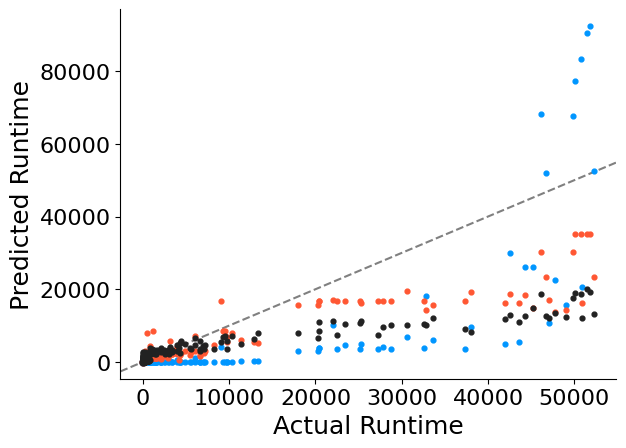

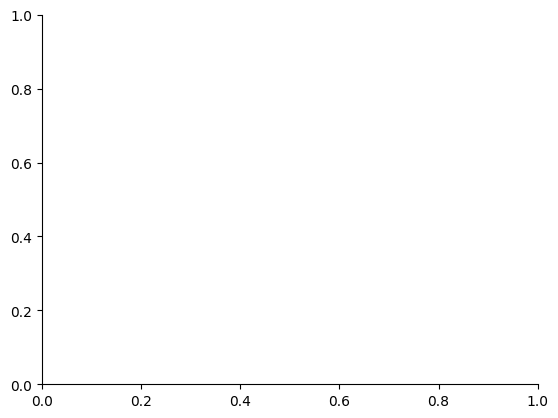

In [ ]:
import os

set_names_dic = {'synthetic_medium': 'Synthetic-max100K', 'synthetic_large': 'Synthetic-max450K', 'real_world_medium':'R-SMALL', 'real_world_large':'R-LARGE'}
model_num = '2'
feature_set_num = '2'
res_version = '_v4'
plots_dir = root_folder + "out/figures/model_{}".format(model_num)
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
for synthetic in ['synthetic_medium']:#, 'real_world_large']:#['synthetic', 'real_world']:
    for metric in ['run_time']:#, 'D3', 'C2D2', 'HPD2']:#, 'HPD2_LCC']:
        generate_plots(synthetic, metric, model_num, feature_set_num, set_names_dic[synthetic], res_version, scale='log')

# Bar plots

In [ ]:
# D3
metric = 'D3'
model_num = '2'
feature_set_num = '2'
res_version = '_v3'
data_types = ['synthetic_large'] # 'synthetic_medium'
#get_table(metric, model_num, feature_set_num, data_types, res_version)
precision = get_table_precision(metric, model_num, feature_set_num, data_types, res_version)

,dataset type,metric,model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,synthetic_medium,MAE,RF,0.07,0.02,0.02,0.04,0.02,0.01,0.07,0.05,0.16,0.02,0.08,0.15
1,synthetic_medium,MAE,MLP,0.07,0.01,0.01,0.02,0.01,0.01,0.09,0.04,0.08,0.01,0.06,0.08
2,synthetic_medium,MAE,kNN,0.08,0.01,0.01,0.01,0.00,0.01,0.12,0.03,0.09,0.01,0.05,0.07
3,synthetic_medium,RMSE,RF,0.07,0.02,0.02,0.05,0.02,0.01,0.09,0.05,0.22,0.02,0.10,0.2
4,synthetic_medium,RMSE,MLP,0.08,0.02,0.02,0.02,0.01,0.01,0.12,0.05,0.12,0.02,0.09,0.1
5,synthetic_medium,RMSE,kNN,0.12,0.01,0.01,0.02,0.00,0.01,0.18,0.04,0.20,0.01,0.09,0.13
6,synthetic_large,MAE,RF,0.04,0.02,0.02,0.03,0.03,0.01,0.05,0.03,0.14,0.02,0.06,NaN
7,synthetic_large,MAE,MLP,0.06,0.01,0.01,0.02,0.01,0.01,0.10,0.03,0.09,0.01,0.05,NaN
8,synthetic_large,MAE,kNN,0.07,0.01,0.01,0.01,0.01,0.01,0.14,0.03,0.09,0.01,0.05,NaN
9,synthetic_large,RMSE,RF,0.05,0.03,0.02,0.04,0.03,0.01,0.07,0.04,0.20,0.02,0.08,NaN


In [ ]:
# D3
metric = 'HPD2'
model_num = '2'
feature_set_num = '2'
res_version = '_v3'
data_types = ['synthetic_large']#, 'synthetic_large']
get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)

,Dataset type,Metric,Model,FF,RDN,RE,RJ,RN,RNE,SB,FS,RD,IRE,MHRW,XS
0,synthetic_large,HPD2,RF,0.13,0.12,0.16,0.11,0.17,0.09,0.18,0.22,0.14,0.12,0.21,NaN
1,synthetic_large,HPD2,MLP,0.13,0.14,0.20,0.08,0.17,0.03,0.18,0.15,0.12,0.11,0.14,NaN
2,synthetic_large,HPD2,kNN,0.16,0.16,0.18,0.15,0.17,0.01,0.15,0.04,0.10,0.16,0.18,NaN


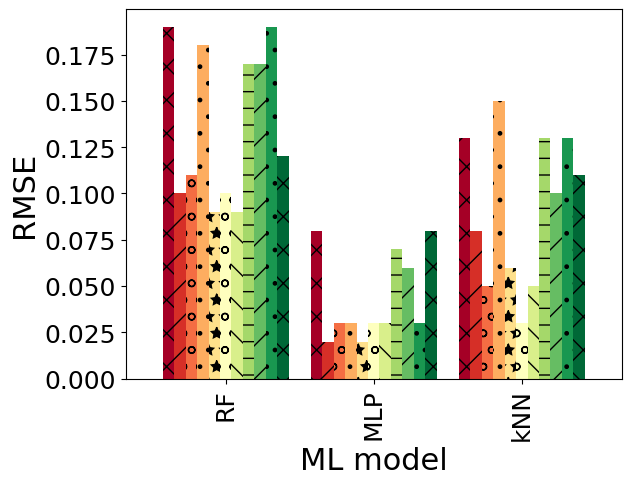

In [ ]:
metric = 'D3'
model_num = '2'
feature_set_num = '2'
res_version = '_v3'
data_types = ['synthetic_medium', 'synthetic_large']
d3_table = get_table(metric, model_num, feature_set_num, data_types, res_version)
# mae
d3_rmse = d3_table[d3_table['metric'] == 'RMSE']

# syn large
d3_sel = d3_rmse[d3_rmse['dataset type'] == 'synthetic_large']

ax = d3_sel.plot.bar(x='model',  fontsize=18,  colormap='RdYlGn', width=0.85, legend=False)

bars = ax.patches
hatches = ''.join(h*len(d3_sel) for h in 'x/o.*o\\-/.x*')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xlabel("ML model", fontdict={'fontsize':22})
ax.set_ylabel("RMSE", fontdict={'fontsize':22})
#ax.legend(loc='upper left', bbox_to_anchor=(-0.55, 1), fontsize=16)
fig = ax.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/syn_large_rmse_{}.png'.format(model_num, metric),  bbox_inches="tight")


In [ ]:
metric = 'D3'
model_num = '2'
feature_set_num = '2'
res_version = '_v3'
data_type = 'synthetic_large'
all_errors_df = pd.DataFrame([])
df_rf = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-RF-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
_, syn_rf_rmse, _, _ = get_measurements_runtime(df_rf)
df_mlp = pd.read_csv(root_folder + 'results/model_' + model_num + '/{}-{}-MLP-feature-set-{}{}.csv'.format(data_type, metric, feature_set_num, res_version))
_, syn_mlp_rmse, _, _ = get_measurements_runtime(df_mlp)
syn_rf_rmse
df_models = pd.concat([syn_rf_rmse, syn_mlp_rmse])
df_models

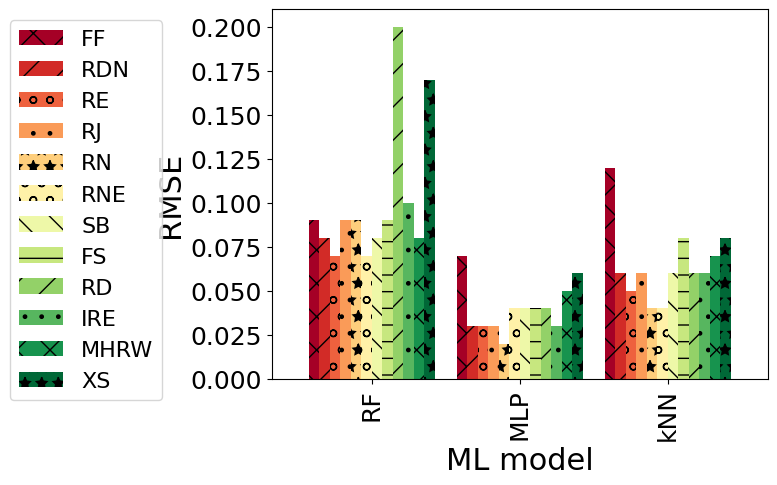

In [ ]:
# syn medium
d3_sel = d3_rmse[d3_rmse['dataset type'] == 'synthetic_medium']

'''
from pylab import *
cdict = {'red': ((0.0, 0.0, 0.0),
                  (0.5, 1.0, 0.7),
                  (1.0, 1.0, 1.0)),
          'green': ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 0.0),
                    (1.0, 1.0, 1.0)),
          'blue': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.5, 1.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
'''
ax = d3_sel.plot.bar(x='model',  fontsize=18,  colormap='RdYlGn', width=0.85)


bars = ax.patches
hatches = ''.join(h*len(d3_sel) for h in 'x/o.*o\\-/.x*')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xlabel("ML model", fontdict={'fontsize':22})
ax.set_ylabel("RMSE", fontdict={'fontsize':22})
ax.legend(loc='upper left', bbox_to_anchor=(-0.55, 1), fontsize=16)
fig = ax.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/syn_medium_rmse_{}.png'.format(model_num, metric),  bbox_inches="tight")


# **All metrics barchart**

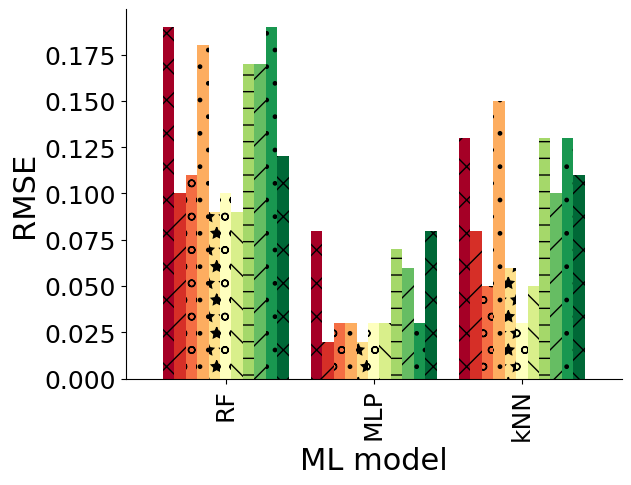

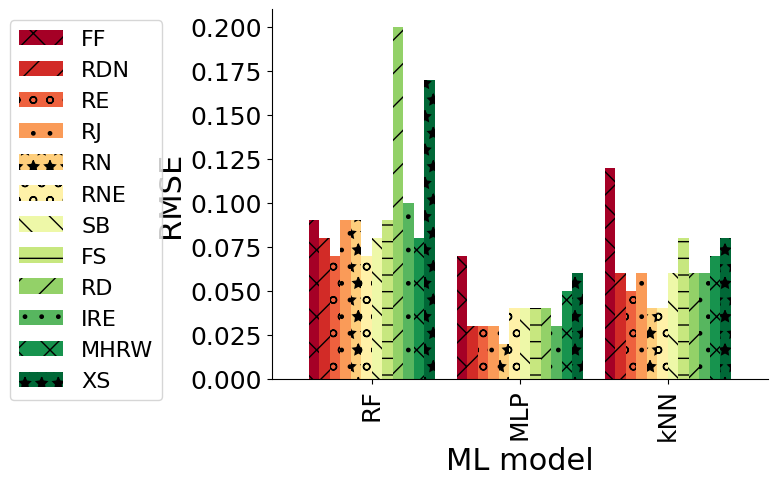

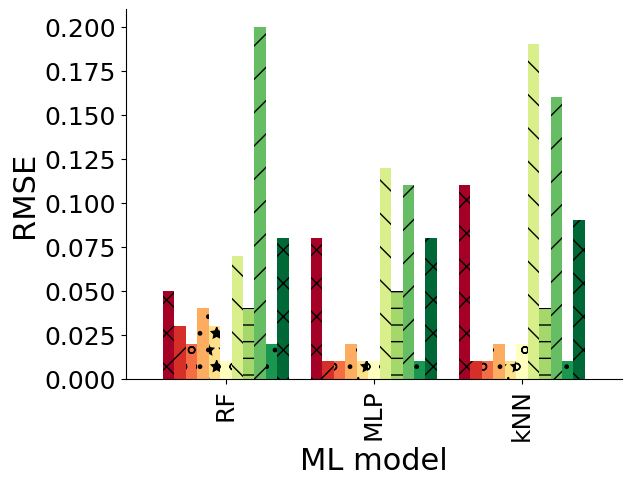

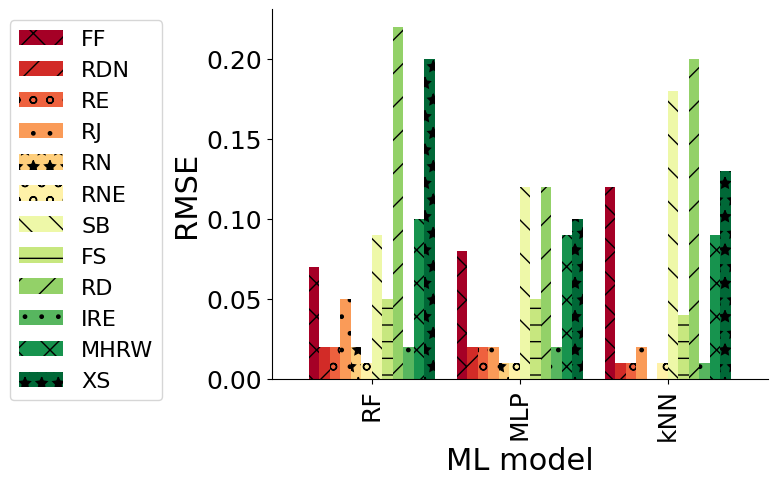

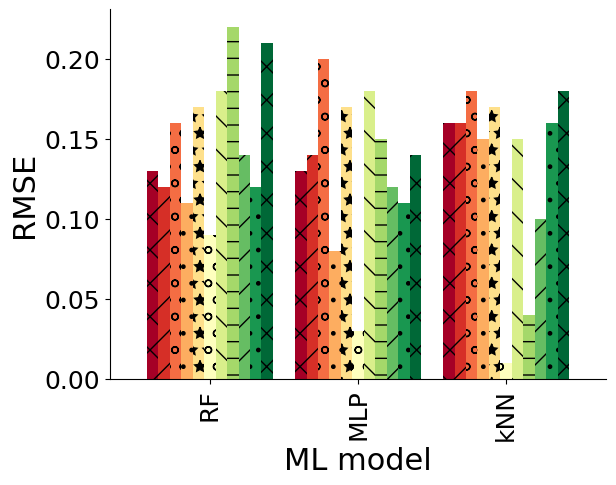

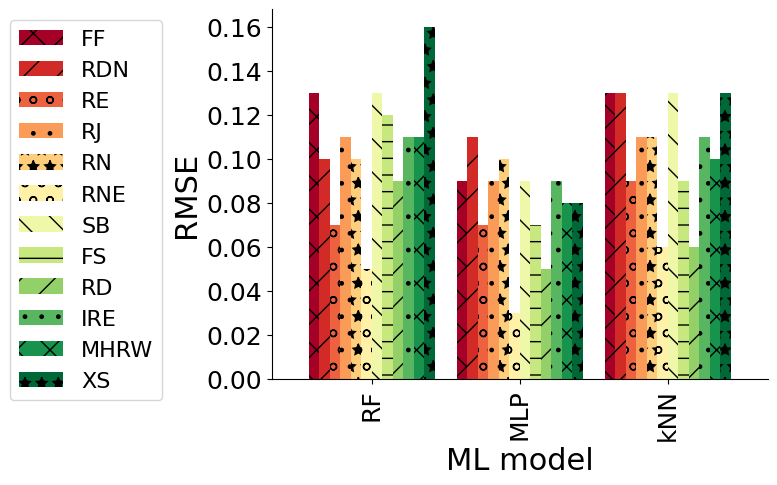

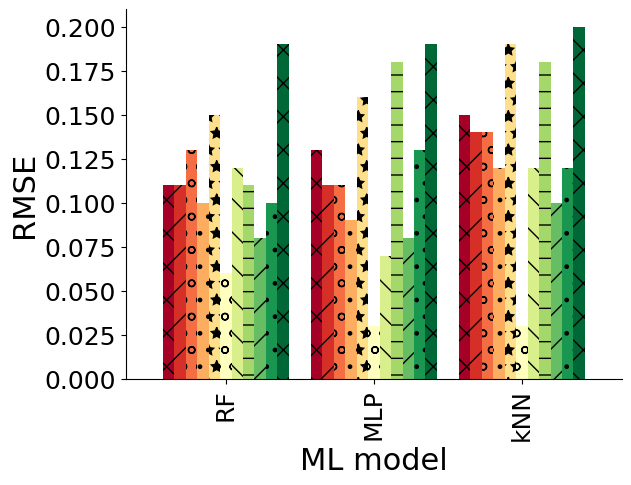

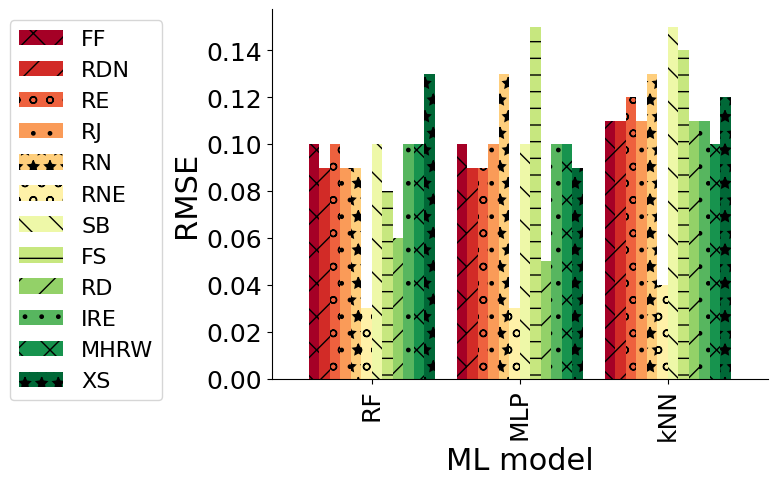

In [ ]:
for metric in ['D3', 'C2D2', 'HPD2','HPD2_LCC']:

  model_num = '2'
  feature_set_num = '2'
  res_version = '_v3'
  data_types = ['synthetic_medium', 'synthetic_large']
  d3_table = get_table(metric, model_num, feature_set_num, data_types, res_version)
  # mae
  d3_rmse = d3_table[d3_table['metric'] == 'RMSE']

  # syn large
  d3_sel = d3_rmse[d3_rmse['dataset type'] == 'synthetic_large']

  ax = d3_sel.plot.bar(x='model',  fontsize=18,  colormap='RdYlGn', width=0.85, legend=False)

  bars = ax.patches
  hatches = ''.join(h*len(d3_sel) for h in 'x/o.*o\\-/.x*')
  for bar, hatch in zip(bars, hatches):
      bar.set_hatch(hatch)

  ax.set_xlabel("ML model", fontdict={'fontsize':22})
  ax.set_ylabel("RMSE", fontdict={'fontsize':22})
  #ax.legend(loc='upper left', bbox_to_anchor=(-0.55, 1), fontsize=16)
  fig = ax.get_figure()
  fig.savefig(root_folder + 'out/figures/model_{}/syn_large_rmse_{}.png'.format(model_num, metric),  bbox_inches="tight")

  # syn medium
  d3_sel = d3_rmse[d3_rmse['dataset type'] == 'synthetic_medium']

  '''
  from pylab import *
  cdict = {'red': ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 0.7),
                    (1.0, 1.0, 1.0)),
            'green': ((0.0, 0.0, 0.0),
                      (0.5, 1.0, 0.0),
                      (1.0, 1.0, 1.0)),
            'blue': ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 0.0),
                    (1.0, 0.5, 1.0))}
  my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
  '''
  ax = d3_sel.plot.bar(x='model',  fontsize=18,  colormap='RdYlGn', width=0.85)


  bars = ax.patches
  hatches = ''.join(h*len(d3_sel) for h in 'x/o.*o\\-/.x*')
  for bar, hatch in zip(bars, hatches):
      bar.set_hatch(hatch)

  ax.set_xlabel("ML model", fontdict={'fontsize':22})
  ax.set_ylabel("RMSE", fontdict={'fontsize':22})
  ax.legend(loc='upper left', bbox_to_anchor=(-0.55, 1), fontsize=16)
  fig = ax.get_figure()
  fig.savefig(root_folder + 'out/figures/model_{}/syn_medium_rmse_{}.png'.format(model_num, metric),  bbox_inches="tight")

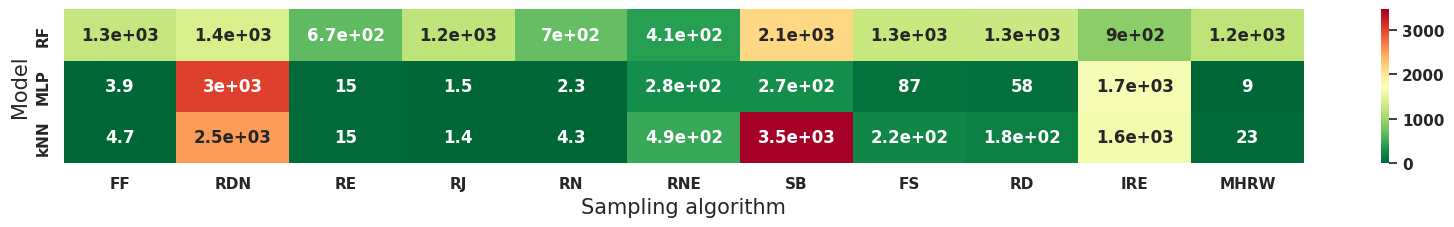

In [ ]:
# synthetic heat map
import seaborn as sns
plt.rcParams["font.weight"] = "bold"

sns.set(font_scale=2)
sns.set_theme(rc={'figure.figsize':(20,2)})

root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
data_types = ['synthetic_large']
res_version = '_v4'
aggr_df = pd.DataFrame([])
for metric in ['run_time']:#,'HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'Max40k', 'real_world_large': 'Max230k'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric', 'XS'])
aggr_df = aggr_df.set_index('Model')
aggr_df
ax = sns.heatmap(aggr_df, annot=True, cmap="RdYlGn_r", vmin=0)#, vmax=3000)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/{}_rmse_heatmap_{}.png'.format(model_num, data_types[0], metric),  bbox_inches="tight")

plt.show()

<Axes: ylabel='Model'>

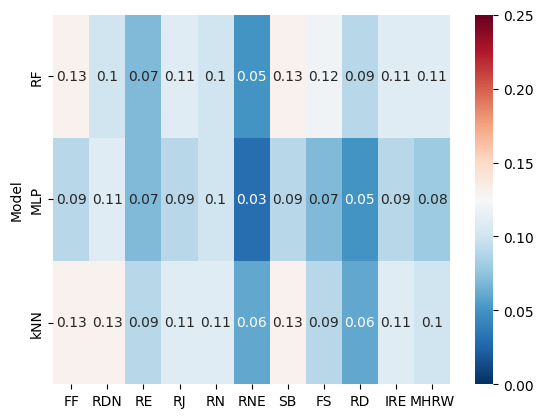

In [ ]:
# synthetic heat map
import seaborn as sns

model_num = '2'
feature_set_num = '2'
data_types = ['synthetic_medium']
res_version = '_v3'
aggr_df = pd.DataFrame([])
for metric in ['HPD2']:#,'HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'Max40k', 'real_world_large': 'Max230k'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric', 'XS'])
aggr_df = aggr_df.set_index('Model')
aggr_df
sns.heatmap(aggr_df, annot=True, cmap="RdBu_r", vmin=0, vmax=0.25)

max values  Model
RF     0.50
MLP    0.54
kNN    0.54
RF     0.49
MLP    0.51
kNN    0.53
dtype: float64


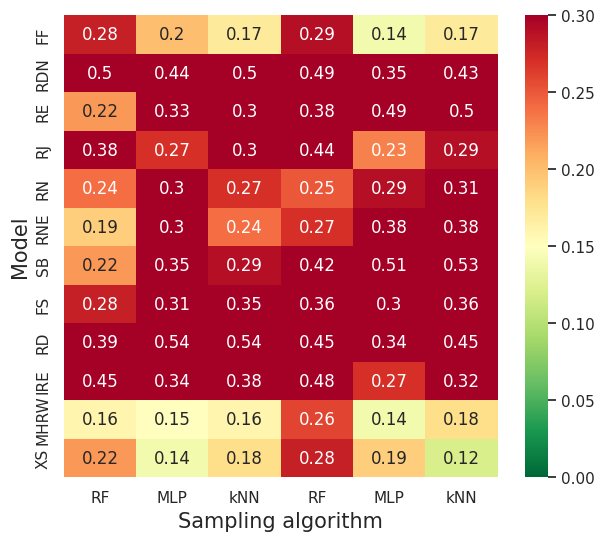

In [ ]:
# rmse real heatmap

import seaborn as sns

model_num = '2'
feature_set_num = '2'
res_version = '_v4'
sns.set(font_scale=2)
sns.set_theme(rc={'figure.figsize':(7,6)})

data_types = ['real_world_medium', 'real_world_large']
real_syn = 'real'
aggr_df = pd.DataFrame([])
for metric in ['D3']:#,'C2D2', 'HPD2','HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
aggr_df = aggr_df.drop(columns=['Dataset type', 'Metric'])
aggr_df = aggr_df.set_index('Model')
aggr_df = aggr_df.T
aggr_df
ax = sns.heatmap(aggr_df, annot=True, cmap="RdYlGn_r", vmin=0, vmax=0.3)#, cbar=False)
print('max values ', aggr_df.max())

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/{}_rmse_heatmap_{}.png'.format(model_num, real_syn, metric),  bbox_inches="tight")

plt.show()

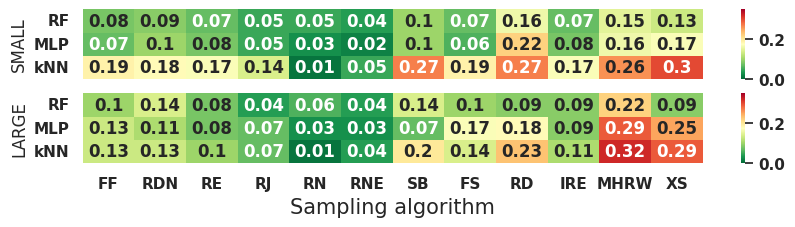

In [ ]:
# real heat map two sizes
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.weight"] = "bold"

sns.set(font_scale=2)
sns.set_theme(rc={'figure.figsize':(10,2)})

root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
data_types = ['real_world_medium']
res_version = '_v4'
metric = 'C2D2'
vmax = 0.35
fig, (ax,ax1) = plt.subplots(nrows=2, figsize=(10, 2))
fig.subplots_adjust(hspace=0.2)

aggr_df = pd.DataFrame([])
for metric in [metric]:#,'HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'SMALL', 'real_world_large': 'LARGE'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric'])
aggr_df = aggr_df.rename(columns={'Model': 'SMALL'})
aggr_df = aggr_df.set_index('SMALL')
aggr_df
sns.heatmap(aggr_df, ax = ax, annot=True, cmap="RdYlGn_r", vmin=0, vmax=vmax)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('R-SMALL', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()

data_types = ['real_world_large']
aggr_df = pd.DataFrame([])
for metric in [metric]:#,'HPD2_LCC']:
  rmse = get_table_rmse(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'SMALL', 'real_world_large': 'LARGE'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric'])
aggr_df = aggr_df.rename(columns={'Model': 'LARGE'})
aggr_df = aggr_df.set_index('LARGE')
aggr_df
sns.heatmap(aggr_df, ax = ax1, annot=True, cmap="RdYlGn_r", vmin=0, vmax=vmax)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('R-LARGE', fontsize = 15) # y-axis label with fontsize 15
fig = ax1.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/real_rmse_heatmap_{}.pdf'.format(model_num, metric), format="pdf",  bbox_inches="tight")

plt.show()

# **ET RMSEs**

In [ ]:
# real heat map two sizes
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.weight"] = "bold"

sns.set(font_scale=2)
sns.set_theme(rc={'figure.figsize':(10,2)})

root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
data_types = ['real_world_medium']
res_version = '_v4'
metric = 'run_time'
vmax = 0.6
fig, (ax,ax1) = plt.subplots(nrows=2, figsize=(10, 2))
fig.subplots_adjust(hspace=0.2)

aggr_df = pd.DataFrame([])
for metric in [metric]:#,'HPD2_LCC']:
  rmse = get_table_runtime_3_metric(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric'])
aggr_df = aggr_df.rename(columns={'Model': 'R-SMALL'})
aggr_df = aggr_df.set_index('R-SMALL')
aggr_df
sns.heatmap(aggr_df, ax = ax, annot=True, cmap="RdYlGn_r", vmin=0, vmax=vmax)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('R-SMALL', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()

data_types = ['real_world_large']
aggr_df = pd.DataFrame([])
for metric in [metric]:#,'HPD2_LCC']:
  rmse = get_table_runtime_3_metric(metric, model_num, feature_set_num, data_types, res_version)
  frames = [aggr_df, rmse]
  aggr_df = pd.concat(frames)

aggr_df = aggr_df.replace({'real_world_medium': 'R-SMALL', 'real_world_large': 'R-LARGE'})
aggr_df = aggr_df.drop(columns = ['Dataset type', 'Metric'])
aggr_df = aggr_df.rename(columns={'Model': 'R-LARGE'})
aggr_df = aggr_df.set_index('R-LARGE')
aggr_df
sns.heatmap(aggr_df, ax = ax1, annot=True, cmap="RdYlGn_r", vmin=0, vmax=vmax)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('R-LARGE', fontsize = 15) # y-axis label with fontsize 15
fig = ax1.get_figure()
fig.savefig(root_folder + 'out/figures/model_{}/real_rmse_heatmap_{}.png'.format(model_num, data_types[0], metric),  bbox_inches="tight")

plt.show()

C2